In [1]:
import glob
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [2]:
#Plotting settings
font = {
        'weight' : 'normal',
        'size'   : 20}

mlib.rc('font', **font)

In [12]:
def histosFromFiles(folder, binwidth, iftoreverse,linewidth=None,transparence=None):
    
    #reading files with histos info (reverse fuction changes the order of the files)
    files = sorted(glob.glob( folder+'/*.dat'),reverse=iftoreverse)
    #print(files)
    
    '''
    #reading cross sections and luminocities to calculate weights
    sigmaLumi=[]
    with open (folder+'/cross-section_lumi.txt', 'r') as f:
        for row in csv.reader(f,delimiter='\t'):
            sigmaLumi.append(row)
    sigmaLumi=sigmaLumi[1:]
    print(sigmaLumi)
    '''
    
    normalize = mcolors.Normalize(0, len(files))
    
    global usedcolors
    usedcolors=[]
    
    print(linewidth[1])
    print(len(files))
    print(len(linewidth))
    
    if len(linewidth) == len(files):
        width=linewidth
    else:
        width=[2]*len(files)
    print(width)
    
    for filenum, file in enumerate(files):
        print(file)
        histoarray = np.array(genfromtxt(file))
        nbins=np.int(np.amax(histoarray)/binwidth)
        n, bins, patches = plt.hist(histoarray, bins=nbins, density=True, histtype='step',fill=False,\
                            alpha=transparence[filenum], rwidth=1, color=colormap(normalize(filenum)),linewidth=width[filenum],zorder=2)
        print(histoarray.size)
        usedcolors.append(colormap(normalize(filenum)))
    #print(usedcolors)

In [32]:
colormap = cm.viridis

2.5
5
5
[2.5, 2.5, 2.5, 4.5, 2.5]
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.75e+02_mT3.24e+02.dat
100000
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.85e+02_mT3.24e+02.dat
100000
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS2.95e+02_mT3.24e+02.dat
100000
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.05e+02_mT3.24e+02.dat
100000
histos/pT_mCfixed_mlvaries/pTl_rr5.00e-08_mS3.14e+02_mT3.24e+02.dat
100000


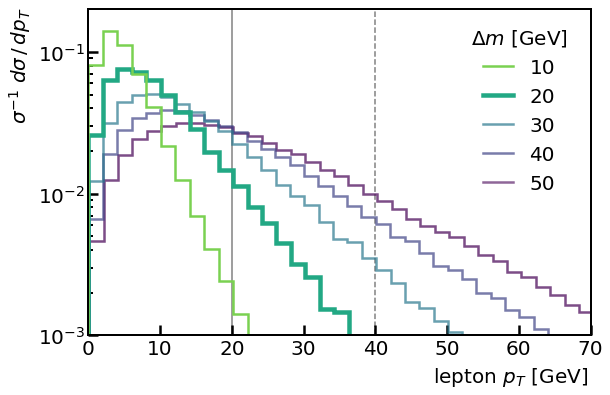

In [33]:
#pTl: mC fixed, ml varies

plt.figure(figsize=(9, 6))
ax = plt.gca()

ax.axvline(20,color ="gray", linestyle ="-",linewidth=1.5,zorder=1)
ax.axvline(40,color ="gray", linestyle ="--",linewidth=1.5,zorder=1)

histosFromFiles('histos/pT_mCfixed_mlvaries',2,False,linewidth=[2.5,2.5,2.5,4.5,2.5],\
                transparence=[0.7,0.7,0.7,1,1])


ax.set_xlim(0,70)
ax.set_ylim(10**(-3),2*10**(-1))
ax.set_yscale("log")

#ax.set_yticks([2e-3,10**(-2),10**(-1)])
#f = mlib.ticker.ScalarFormatter(useOffset=False, useMathText=True)
#g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
#ax.get_yaxis().set_major_formatter(mlib.ticker.FuncFormatter(g))
#ax.get_yaxis().set_major_formatter(mlib.ticker.ScalarFormatter())

#plt.title("$m_C=324$")
plt.xlabel('lepton $p_T$ [GeV]')
plt.ylabel('$\sigma^{-1}\ d\\sigma\,/\,d p_{T}$')
#plt.ylabel('$\\frac{d\\sigma}{\sigma\ d p_{T}\,(l)}$',fontsize=20
ax.xaxis.set_label_coords(0.84, -0.09)
ax.yaxis.set_label_coords(-0.11,0.83)

#mpatches.Rectangle(height=2)

patch1=mlines.Line2D([],[],color=usedcolors[0], linewidth=2.5,label='50',alpha=0.6)
patch2=mlines.Line2D([],[],color=usedcolors[1], linewidth=2.5,label='40',alpha=0.7)
patch3=mlines.Line2D([],[],color=usedcolors[2], linewidth=2.5,label='30',alpha=0.7)
patch4=mlines.Line2D([],[],color=usedcolors[3], linewidth=4.5,label='20',alpha=1)
patch5=mlines.Line2D([],[],color=usedcolors[4], linewidth=2.5,label='10',alpha=1)


plt.legend(handles=[patch5,patch4,patch3,patch2,patch1],handlelength=1.5,loc='upper right',\
           title="$\\Delta m$ [GeV]",shadow=None,\
           edgecolor='white',bbox_to_anchor=(0.99, 0.5, 0.0001, 0.5))

#ylabels = [f._formatSciNotation('%1.10e' % w).replace('{\\times}', '\cdot') for w in ax.get_yticks()]
#ax.set_yticklabels([f'${i}$' for i in ylabels])

ax.tick_params(which="major",axis="both",direction="in",color="black",length=10,width=2.5)
ax.tick_params(which="minor",axis="both",direction="in",color="black",length=5,width=2)

for child in ax.get_children():
    if isinstance(child, mlib.spines.Spine):
        child.set_color('black')
        child.set_linewidth(2)
        
plt.savefig('pT_different_splittings.png')